In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

# Wavelets & Cone of Influence

This tutorial will show the main steps involved in Wavelet analysis using `periodicity`. As with other tools from the `timefrequency` module, the aim is to localize the periodicities in time. That's specially useful for signals with additional information in their varying variance or fundamental frequency. 

For a deeper theoretical discussion on Wavelet analysis, see the practical guide by [Torrence and Compo (1998)](https://paos.colorado.edu/research/wavelets/bams_79_01_0061.pdf).

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from periodicity.core import TSeries
from periodicity.data import SpottedStar
from periodicity.timefrequency import WPS

In [3]:
plt.rc("lines", linewidth=1.0, linestyle="-", color="black")
plt.rc("font", family="sans-serif", weight="normal", size=12.0)
plt.rc("text", color="black", usetex=True)
plt.rc("text.latex", preamble="\\usepackage{cmbright}")
plt.rc(
    "axes",
    edgecolor="black",
    facecolor="white",
    linewidth=1.0,
    grid=False,
    titlesize="x-large",
    labelsize="x-large",
    labelweight="normal",
    labelcolor="black",
)
plt.rc("axes.formatter", limits=(-4, 4))
plt.rc(("xtick", "ytick"), labelsize="x-large", direction="in")
plt.rc("xtick", top=True)
plt.rc("ytick", right=True)
plt.rc(("xtick.major", "ytick.major"), size=7, pad=6, width=1.0)
plt.rc(("xtick.minor", "ytick.minor"), size=4, pad=6, width=1.0, visible=True)
plt.rc("legend", numpoints=1, fontsize="x-large", shadow=False, frameon=False)

The data is taken from Kepler observations of the star KIC 9655172 from December 2009 to June 2010 (totaling six months or ~180 days). If we plot the data, we can visually detect a seasonality of ~10 days, with varying amplitude levels.

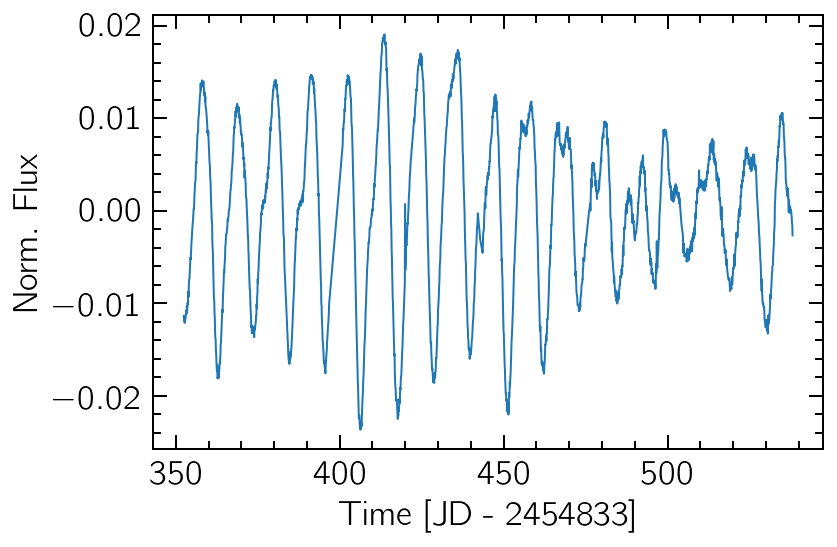

In [4]:
t, y, dy = SpottedStar()
sig = TSeries(t, y)

sig.plot()
plt.xlabel("Time [JD - 2454833]")
plt.ylabel("Norm. Flux");

## Plotting the Wavelet Power Spectrum

The creation of a new `WPS` object requires only a period grid on which to calculate the wavelet transform. A generally good advice is to use a log-uniform grid.

In [5]:
periods = np.logspace(0, 7, 1000, base=2)
wps = WPS(periods)

The created object can now be called with the input signal, returning a `TFSeries` which can be plotted and analysed with the usual tools.

More importantly, the `plot_coi` method will fill the area around the Cone of Influence, where edge effects become relevant.

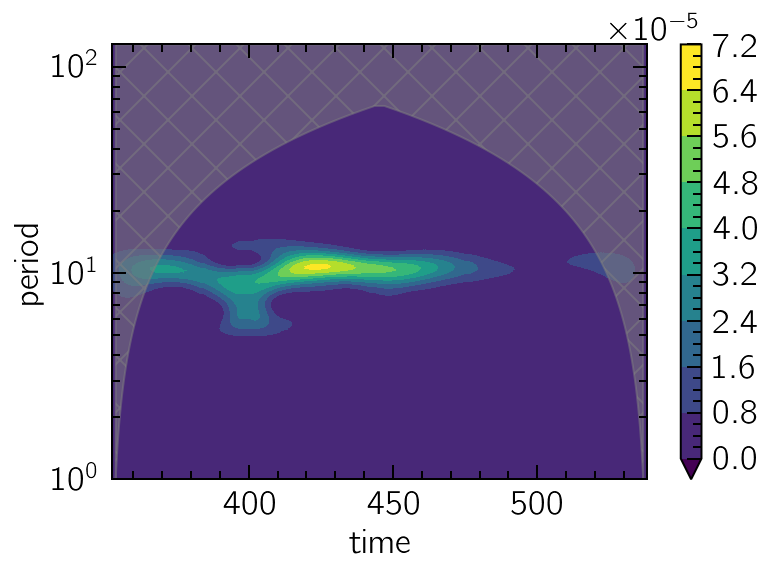

In [6]:
spectrum = wps(sig)

spectrum.contourf(y="period", extend="min", levels=10)
wps.plot_coi(hatch="x", color="grey", alpha=0.5)
plt.yscale("log");

## The Scale Average Variance (SAV)

The scale-average of the WPS, known as the SAV, is the projection of the representation on the time axis. It can give a good approximation on the variations of the signal variance with time.

The COI can also be used to mask out values on the edges.

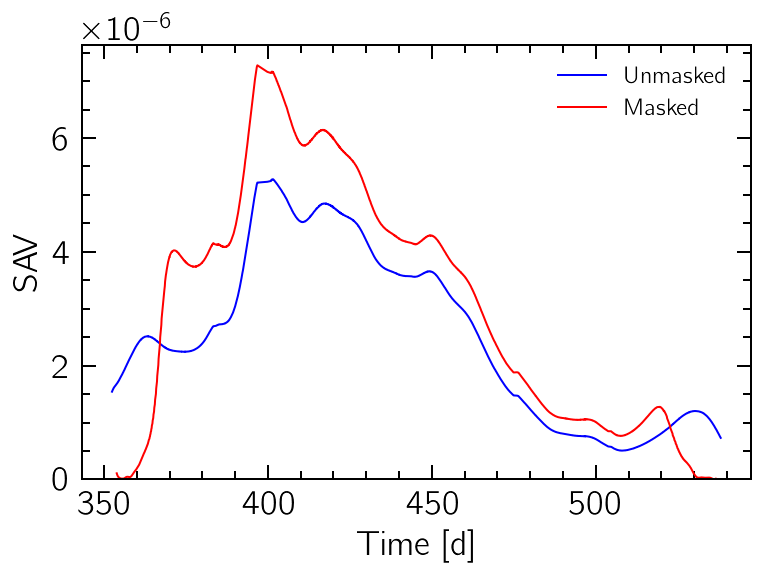

In [7]:
wps.sav().plot("b", label="Unmasked")
wps.masked_sav().plot("r", label="Masked")
plt.ylim(0)
plt.xlabel("Time [d]")
plt.ylabel("SAV")
plt.legend(fontsize=12);

## The Global Wavelet Power Spectrum

Similarly, by performing the time-average of the WPS, a global power spectrum can be obtained. This can be useful to determine the main persistent periodicity on the signal. Once again, the COI can be used to mask-out edge effects.

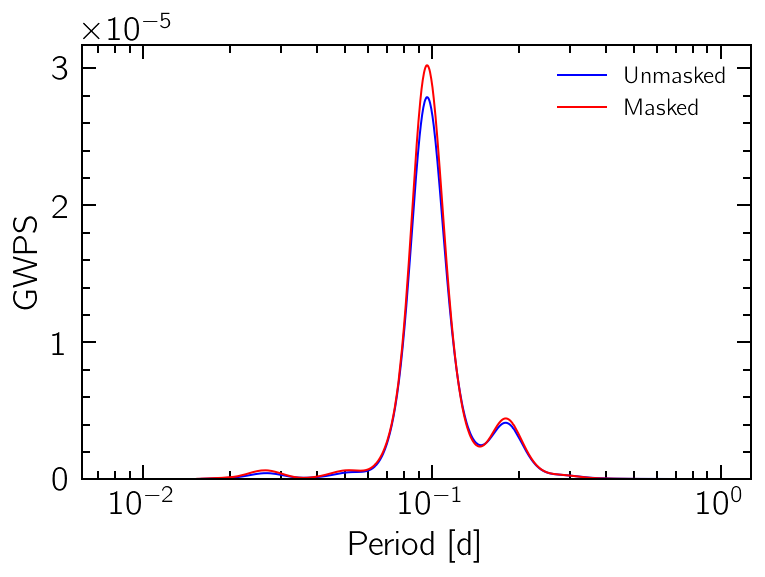

In [8]:
wps.gwps().plot("b", label="Unmasked")
wps.masked_gwps().plot("r", label="Masked")
plt.ylim(0)
plt.xlabel("Period [d]")
plt.ylabel("GWPS")
plt.xscale("log")
plt.legend(fontsize=12);

In [9]:
print(wps.gwps().period_at_highest_peak, wps.masked_gwps().period_at_highest_peak)

10.391826740281603 10.391826740281603
